# AI in Action

# Introduction

Negotiation is a dialogue between two or more parties aimed at reaching a consensus or resolving a conflict. It is a fundamental aspect of human interaction, whether in business, politics, or personal relationships. Effective negotiation involves understanding the interests and goals of all parties, communicating clearly, and finding mutually beneficial solutions.

In this project, we will explore the use of data and machine learning to predict the outcomes of negotiations. By analyzing historical negotiation data, we aim to develop a system that can assist negotiators in making informed decisions and improving their chances of success. This system, named "Negoisst," will leverage dialogue data to provide insights and predictions about the negotiation process.

This project is a collaborative effort by four members: Maxim Gerassimenya, Theodoros Koletsis, Tarkan Yildirim, and Julius Hirsch.

## Agenda

1. **Data Exploration**
   - Understanding the dataset
   - Identifying key features and variables
   - Initial data visualization

2. **Data Cleansing**
   - Handling missing values
   - Removing duplicates
   - Correcting data inconsistencies

3. **Pre-processing**
   - Normalizing and scaling data
   - Encoding categorical variables
   - Splitting data into training and testing sets

4. **Representation Techniques**
   - Feature engineering
   - Dimensionality reduction
   - Text representation methods (e.g., TF-IDF, word embeddings)

5. **Machine Learning Techniques Application/Modeling of Data**
   - Selecting appropriate machine learning models
   - Training and tuning models
   - Evaluating model performance
   - Making predictions and interpreting results

## Data Exploration

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
#%pip install nltk
import nltk
#%pip install --upgrade pandas
#%pip install openpyxl --upgrade

In [2]:
# Read excel file
df = pd.read_excel('Group1.xlsx')


In [3]:
df # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


##### Missing values and Duplicates

In [4]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the further analysis.

In [5]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
215,965,966,Counteroffer,FinalAccept,"Dear Mr.Novak, \nI am so glad both of our side..."
270,1105,1106,Counteroffer,FinalReject,"Dear Ms. Novak, \nI assure you that there is n..."
400,1441,1442,Counteroffer,FinalReject,Thank you for sending me your first offer. Alt...
470,1833,1834,FinalAccept,FinalAccept,"So, Ms. Novak, this is our official acceptance..."
731,3037,3038,Counteroffer,FinalAccept,"Dear Mr. Novak, \nI would really like to close..."
929,3877,3878,Counteroffer,FinalAccept,"Dear Sasa, of course you agree with the direct..."
1555,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."
1747,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."


## Analyzing text statistics

We will begin by running text statistics visualizations some very insightful techniques.

They include:

word frequency analysis,
sentence length analysis,
average word length analysis,
etc.
Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the content's length.

## Average Length of Content/Sentence and Word

In [6]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# Assuming df is your DataFrame and 'Content' is the column with text data
df['Content_Length'] = df['Content'].apply(len)
df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x)))
df['Word_Count'] = df['Content'].apply(lambda x: len(word_tokenize(x)))

# Calculate averages
average_content_length = df['Content_Length'].mean()
average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
average_word_length = df['Content_Length'].sum() / df['Word_Count'].sum()

print(f"Average Content Length: {average_content_length}")
print(f"Average Sentence Length: {average_sentence_length}")
print(f"Average Word Length: {average_word_length}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Content Length: 1291.4202401372213
Average Sentence Length: 98.42768898911658
Average Word Length: 5.03256403100827


<Axes: >

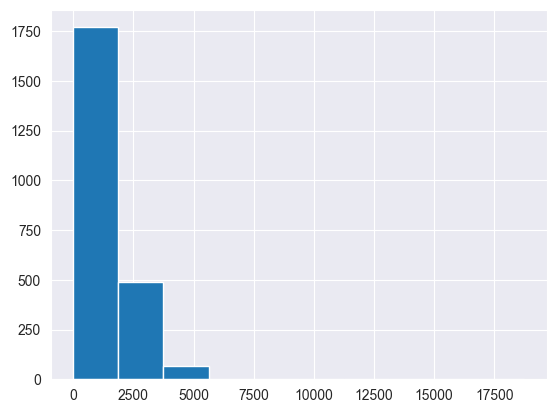

In [7]:
df['Content'].str.len().hist()

The histogram shows that Content range from 0 to 5200 characters and generally, it is between 0 to 1500 characters.

Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each Content.

<Axes: >

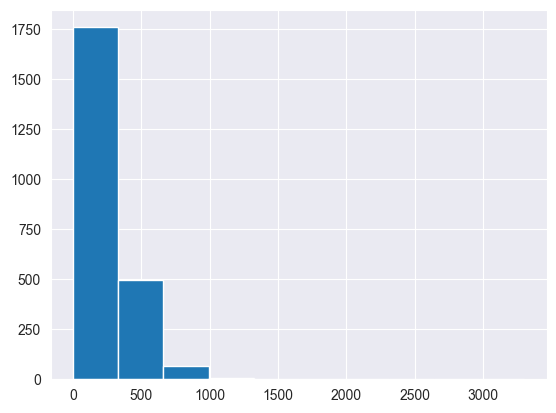

In [8]:
df["Content"].str.split().map(lambda x: len(x)).hist()


It is clear that the number of words in the content columns ranges from 0 to 500 and mostly falls between 100 to 300 words.

Up next, let’s check the average word length in each sentence.

<Axes: >

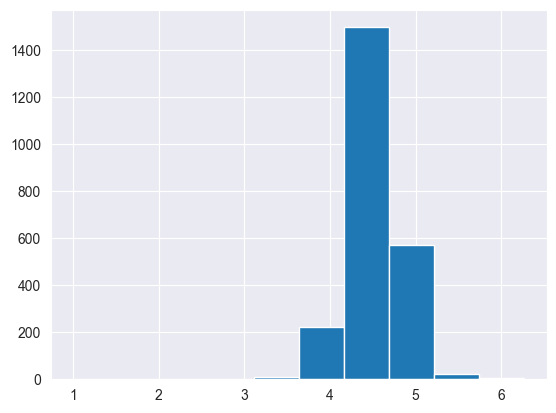

In [9]:
df['Content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()


We note that the avg word length is around 3-6 words per sentence. Does this imply that the users are using really short sentecens or are they using short words, we will find out in the next steps.

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be right-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus.

In [10]:
# Check the length of the content
df["length"] = df["Content"].str.len()
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,Content_Length,Sentence_Count,Word_Count,length
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,17,470,2529
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,21,483,2579
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,15,454,2336
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,13,381,1961
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,10,376,1917


In [11]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount'] = df['Content'].apply(word_count)
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,Content_Length,Sentence_Count,Word_Count,length,WordCount
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,17,470,2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,21,483,2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,15,454,2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,13,381,1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,10,376,1917,343


In [12]:
df["NegoOutcome"].value_counts() # The result shows us that the data is imbalanced but not as strong since there are 1604 accepts and 728 rejections

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

In [13]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [14]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [15]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1604, 728)

##### Length of words/sentences

In [16]:
# Check if the sum of the two counts is equal to the total number of rows in the df
df.shape

(2332, 10)

The test showed us that the df indeed has the correct number of rows it also has in total 2332 observation and 7 parametric variables. We will run some summary statistics to see the distribution and further insights into the dataset that may helkp us for the analysis and NLP techniques.

In [17]:
# Summary statistics
print(df.describe())
print(df.describe(include=['O']))  # For categorical features



           SenderID    ReceiverID  Content_Length  Sentence_Count  \
count   2332.000000   2332.000000     2332.000000     2332.000000   
mean    1849.926244   1849.963551     1291.420240       13.120497   
std     6614.148794   6614.152981     1108.602775       10.435871   
min       31.000000     31.000000        1.000000        1.000000   
25%      178.000000    178.000000      499.000000        6.000000   
50%      462.000000    462.000000      998.000000       10.000000   
75%     2095.000000   2095.000000     1829.250000       18.000000   
max    67766.000000  67766.000000    18737.000000      182.000000   

        Word_Count        length    WordCount  
count  2332.000000   2332.000000  2332.000000  
mean    256.612779   1291.420240   230.884220  
std     216.918060   1108.602775   195.871096  
min       1.000000      1.000000     1.000000  
25%     102.000000    499.000000    90.000000  
50%     202.000000    998.000000   181.000000  
75%     363.250000   1829.250000   328.000

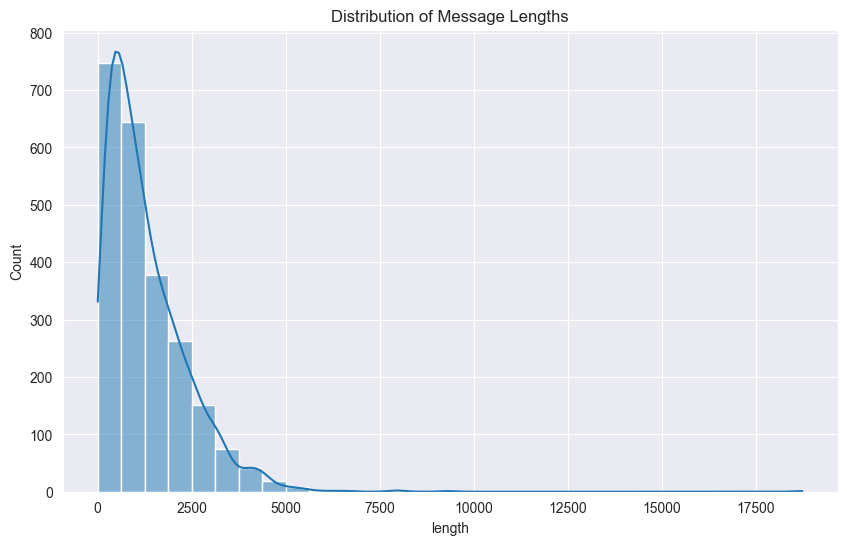

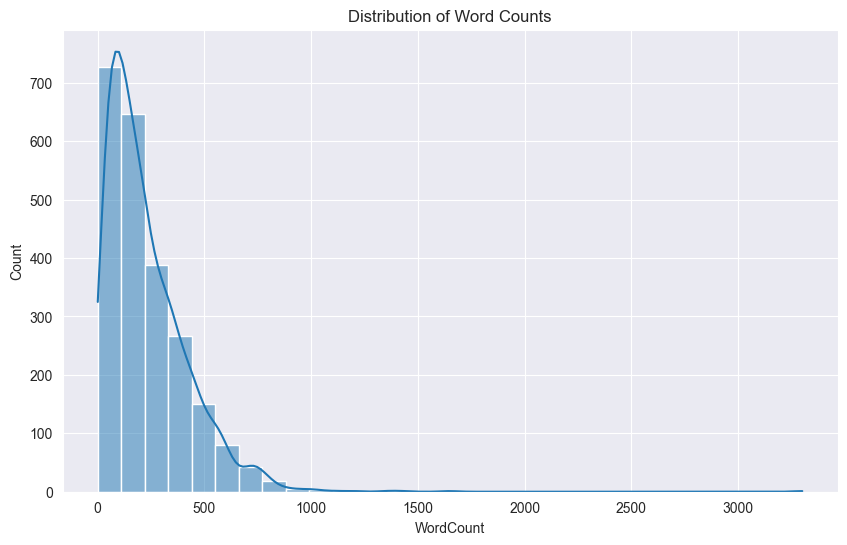

In [18]:
# Visualize the distribution of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.show()

# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['WordCount'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.show()

The results show that the distribution of message lengths and word counts are right-skewed since it has a long right tail and mostly concentrated on the left side of the graph. We may need to transform the data or preprocess it better to reach better results

In [19]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,Content_Length,Sentence_Count,Word_Count,length,WordCount,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,17,470,2529,429,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,21,483,2579,439,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,15,454,2336,409,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,13,381,1961,345,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,10,376,1917,343,1


Now we will run a topic analysis and generate a WordCloud to visualize the most common words in the accepted and rejected messages. Therefore as usual we will download new installments to conduct the analysis.

In [20]:
#%pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

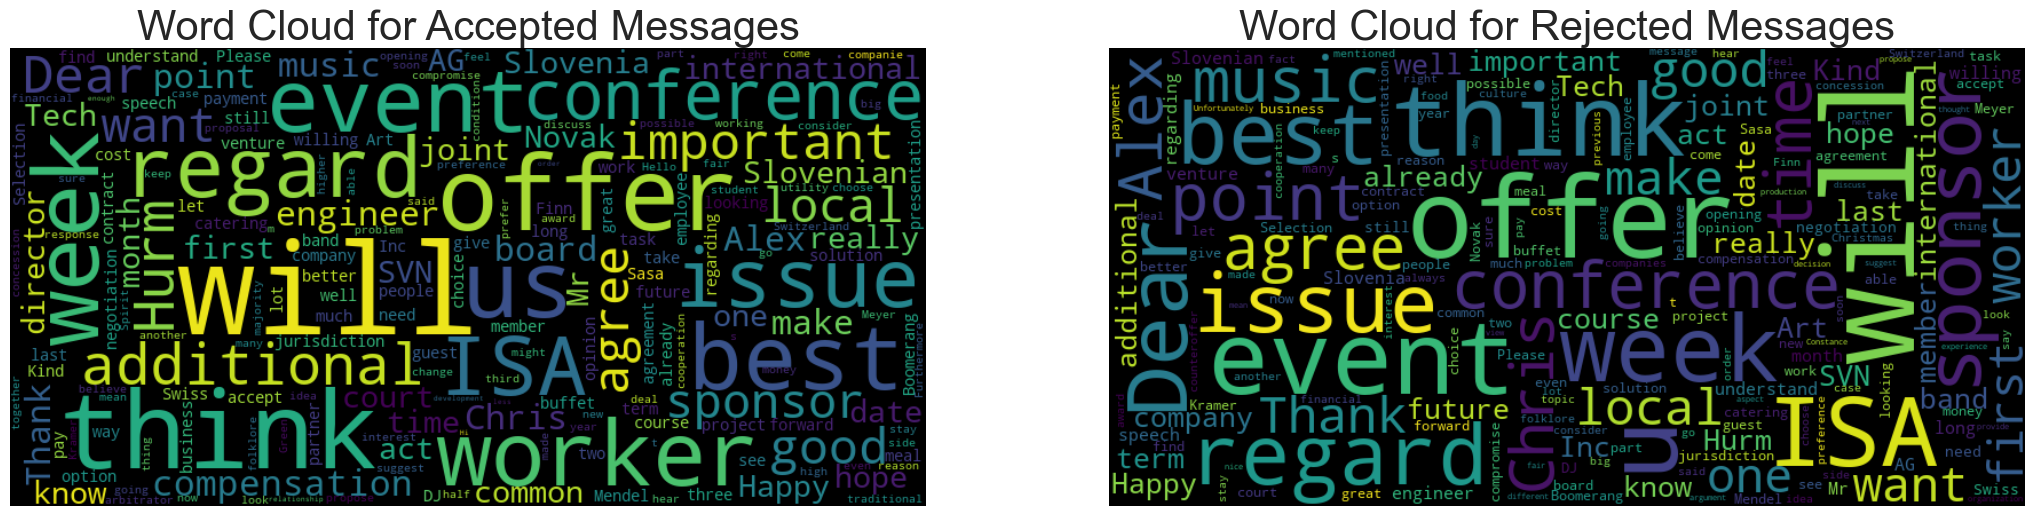

In [21]:
from wordcloud import WordCloud

# Create a worcloud for the accepted messages
fix, (ax1,ax2) = plt.subplots(1, 2, figsize=(26, 8))

# Create a word cloud separetely for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(rejected_messages))

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30)
ax1.axis('off')

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30)
ax2.axis('off')


The respective wordclouds do not seem to have much space for interpretability since the used words do not seem to have a clear meaning and are just random used words that just happened to be used often. To prevent this we will need to practice a better data cleansing because how it is right we will not be able to run NLP techniques at all with these data.

In [22]:
all_messages = df["Content"]
all_messages

0       Dear Mr. Mendel, \nHope you are doing well! \n...
1       Dear Mr. Novak, \nThank you for reaching out t...
2       Dear Mr. Mendel, \nThank your kind response – ...
3       Dear Mr. Novak, \nThank you for your swift rep...
4       Dear Mr. Mendel, \nThank you for your proposal...
                              ...                        
2327    Dear Chis Meyer,\n \nthank you for your latest...
2328    Dear Alex Kramer,\nthank you very much for you...
2329    Dear Chris Meyer,\nthank you for your fast ans...
2330    Dear Alex Kramer,\nI am still very interested ...
2331    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

## Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

But before getting into topic modeling we have to pre-process our data a little. We will:

tokenize: the process by which sentences are converted to a list of tokens or words.
remove stopwords
lemmatize: reduces the inflectional forms of each word into a common base or root.
convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [24]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:

import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [26]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.023*"would" + 0.016*"event" + 0.014*"think" + 0.013*"ISA" + 0.012*"week" + 0.009*"conference" + 0.008*"offer" + 0.008*"Chris" + 0.008*"Alex" + 0.007*"sponsor"'),
 (1,
  '0.017*"worker" + 0.017*"would" + 0.012*"additional" + 0.012*"Hurm" + 0.011*"compensation" + 0.009*"Slovenia" + 0.009*"board" + 0.009*"common" + 0.009*"director" + 0.009*"Slovenian"'),
 (2,
  '0.018*"offer" + 0.011*"Alex" + 0.009*"Chris" + 0.007*"utility" + 0.007*"point" + 0.006*"negotiation" + 0.006*"would" + 0.006*"think" + 0.006*"regard" + 0.006*"make"'),
 (3,
  '0.017*"would" + 0.015*"offer" + 0.011*"Dear" + 0.011*"Hurm" + 0.010*"worker" + 0.009*"SVN" + 0.009*"Novak" + 0.008*"Tech" + 0.008*"Mendel" + 0.008*"issue"')]

In [27]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

Note: you may need to restart the kernel to use updated packages.


/Users/tarkanyildirim/opt/anaconda3/envs/AiiA_Assignment/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9216) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/tarkanyildirim/opt/anaconda3/envs/AiiA_Assignment/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9216) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/tarkanyildirim/opt/anaconda3/envs/AiiA_Assignment/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9216) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/tarkanyildirim/opt/anaconda3/envs/AiiA_Assignment/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9216) is multi-threaded, use of fork(

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

### N-gram exploration
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

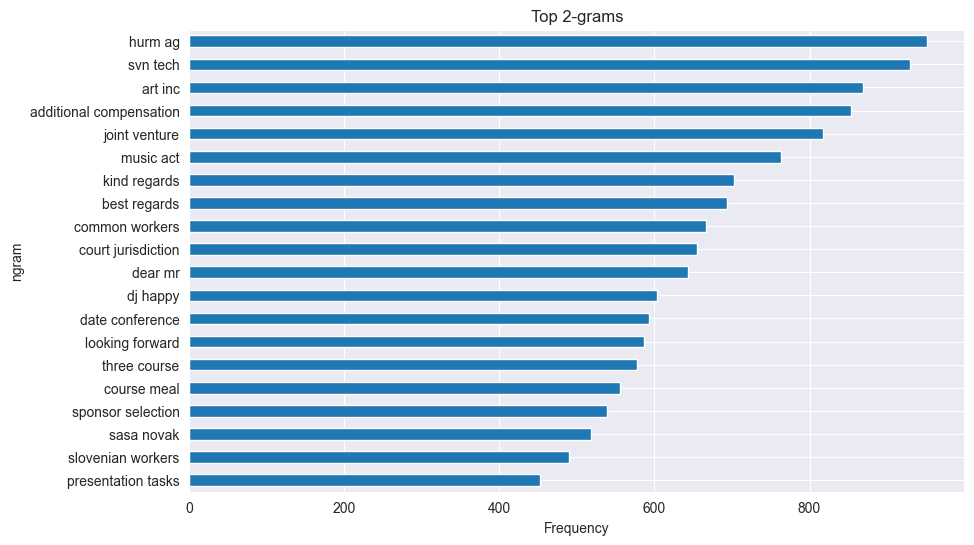

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams


The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). The data likely comes from corporate or legal documents, with some references to formal emails or correspondence. We will also try out trinomial freauence to test whether we will find out more pattern and analyze the data further.

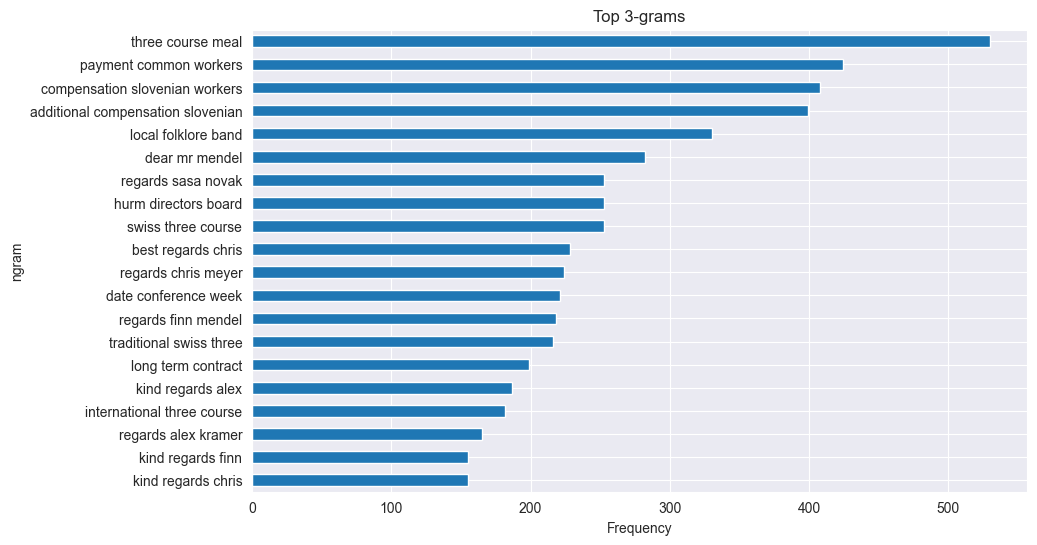

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams


Both frequencies analysis show us different patterns. The binomial more easier and faster pattern that are easier to identify and trinomial helps us understand the context more since it goes fruther into the data.

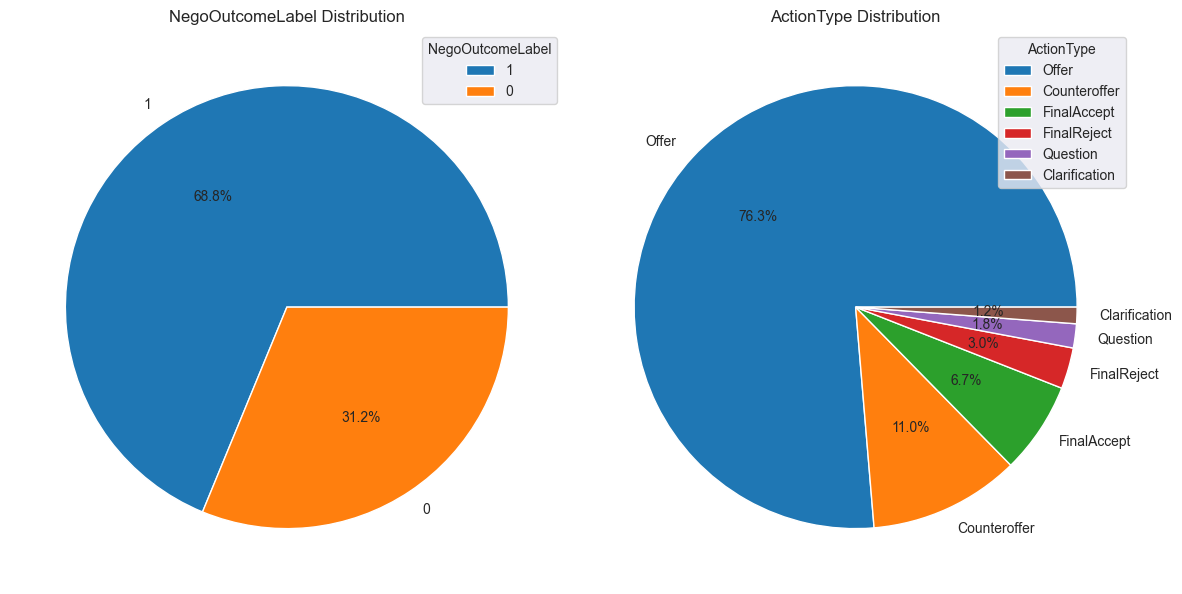

In [30]:
import matplotlib.pyplot as plt

#Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcomeLabel'].value_counts(), labels=df['NegoOutcomeLabel'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="NegoOutcomeLabel", loc="best")
plt.title('NegoOutcomeLabel Distribution')

#Plot the pie chart for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="ActionType", loc="best")
plt.title('ActionType Distribution')

#Show the plots
plt.tight_layout()
plt.show()

## Named Entity Recognitions

### SpaCy

In [31]:
# Named entity recognition
import spacy
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")


Model loaded successfully!


In [32]:

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message
sample_text = df['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text)

spaCy model loaded successfully!


/Users/tarkanyildirim/opt/anaconda3/envs/AiiA_Assignment/lib/python3.12/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import HTML, display


In [34]:
import spacy
from collections import defaultdict
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    for text in dataset['Content']:
        doc = nlp(text)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities

# Extract entities from the dataset
entities = extract_entities_from_dataset(df)

# Convert entities to a DataFrame for better readability
entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))

# Display the extracted entities grouped by type
print(entity_df)


spaCy model loaded successfully!
                  PERSON              NORP                     ORG   ORDINAL  \
0    Local Folklor Bands        Slovantion  Chris     Best Regards     First   
1         BR Finn Mendel           Florian                      Nr  secondly   
2         Alex   Sponsor          european                    Menu  Fourthly   
3              Constance  Eastern European       the Green Spririt    Fourth   
4            Alexa Brown             Joint     the Conference Date   firstly   
..                   ...               ...                     ...       ...   
911                  NaN               NaN                     NaN       NaN   
912                  NaN               NaN                     NaN       NaN   
913                  NaN               NaN                     NaN       NaN   
914                  NaN               NaN                     NaN       NaN   
915                  NaN               NaN                     NaN       NaN   

      

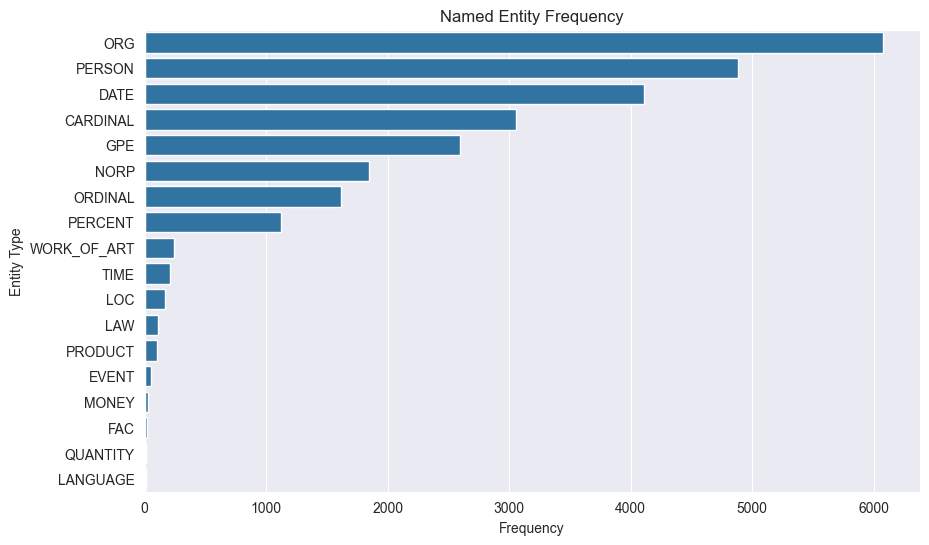

In [35]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

# Apply the ner function to the 'Content' column and flatten the results
ent = df['Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]  # Flatten the list of lists

# Count the occurrences of each entity type
counter = Counter(ent)
count = counter.most_common()

# Visualize the entity frequencies
x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x)
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.title('Named Entity Frequency')
plt.show()


## Part-of-Speech
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

spaCy model loaded successfully!


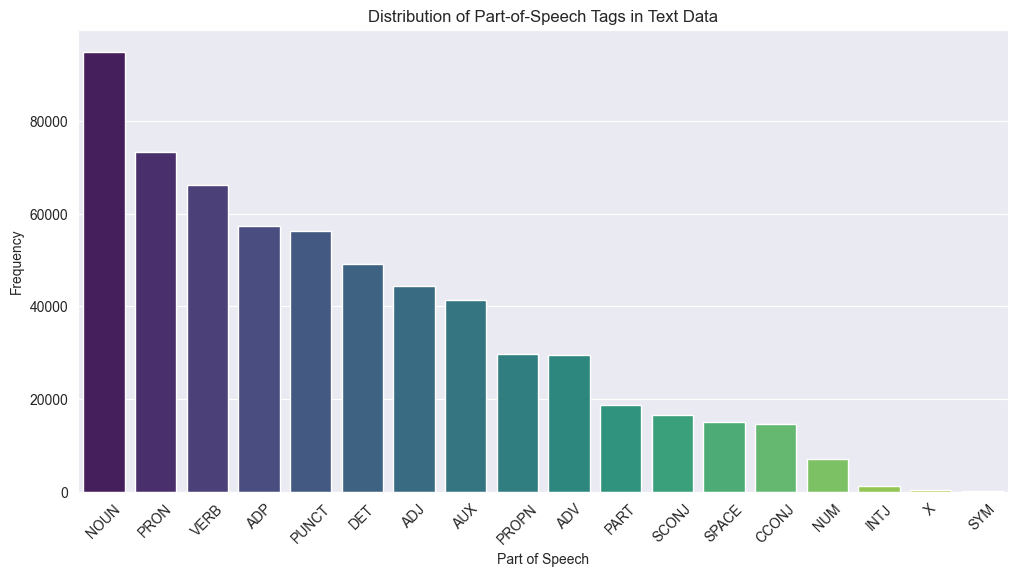

In [36]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply the POS tagging function to the text data
pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

# Flatten the list of lists into a single list of POS tags
pos_tags = [tag for sublist in pos_tags for tag in sublist]

# Count the occurrences of each POS tag
pos_counter = Counter(pos_tags)
pos_counts = pos_counter.most_common()

# Prepare the data for visualization
x, y = zip(*pos_counts)

# Visualize the distribution of POS tags
plt.figure(figsize=(12, 6))
sns.barplot(x=list(x), y=list(y), palette="viridis")
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags in Text Data')
plt.xticks(rotation=45)
plt.show()


## Sentiment Analysis

In [37]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment)

# Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

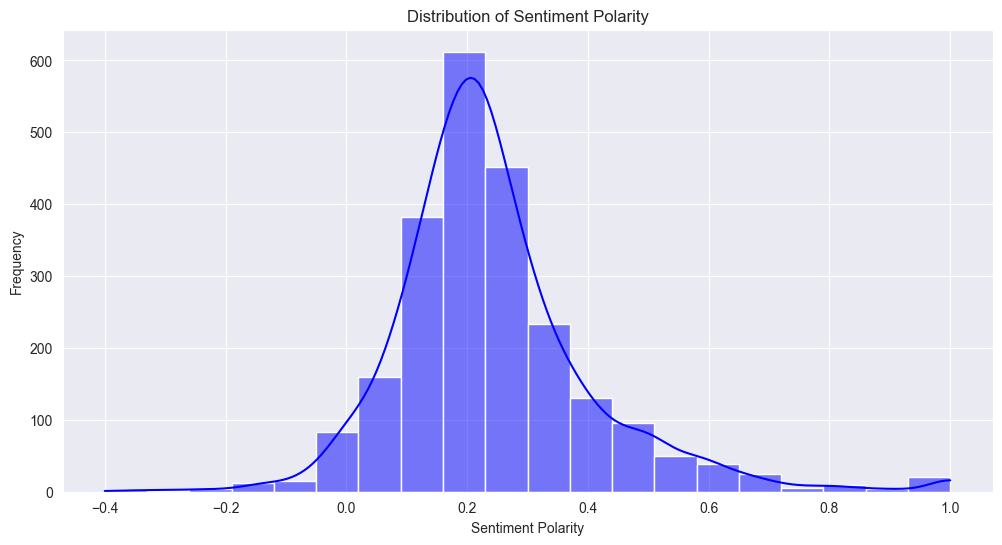

In [38]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Polarity Scores:
-1 to 0: Negative sentiment. The closer the score is to -1, the more negative the text is.
0: Neutral sentiment. Text that is neither strongly positive nor strongly negative.
0 to +1: Positive sentiment. The closer the score is to +1, the more positive the text is.

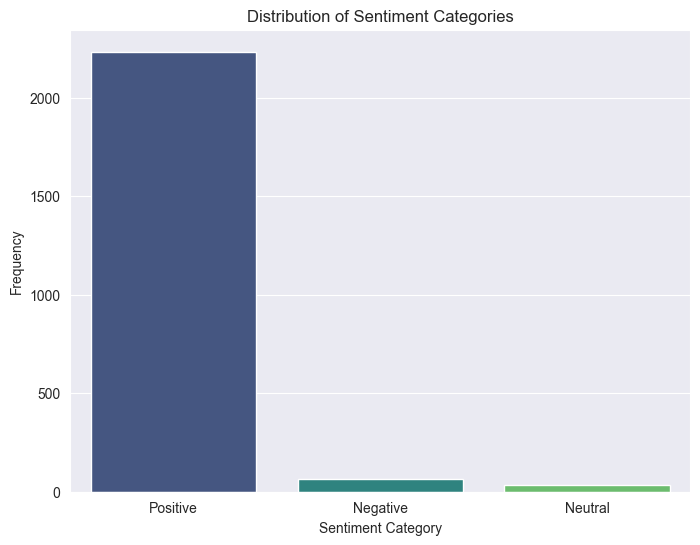

In [39]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

Alternative: Using VADER for Fine-Tuned Sentiment Analysis
If you prefer using a pre-trained sentiment analyzer, consider VADER, which is more suitable for social media or short text analysis. Let me know if you'd like to see an example with VADER instead!